In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from rcparams import rcparams
mpl.rcParams.update(rcparams)

### Comparison of the Far-Field Approximation with the Exact Potential

In order to assess the validity of the far-field approximation obtained by keeping only the lowest-order term in the multipole expansion, we compare it directly with the exact electrostatic potential computed from Coulomb’s law.

Both expressions are evaluated in the $x$–$y$ plane and expressed in terms of the dimensionless radial variable
$$
\rho \equiv \frac{r}{a},
$$
so that the comparison is independent of the specific length scale $a$.

The approximate potential, valid for $r \gg a$, is
$$
\Phi_{\text{approx}}(\rho)
= -\frac{q}{4\pi\epsilon_0 a}\,\rho^{-3},
$$
which corresponds to the leading nonvanishing multipole term.

The exact potential in the $x$–$y$ plane, obtained directly from Coulomb’s law, is
$$
\Phi_{\text{exact}}(\rho)
= -\frac{q}{4\pi\epsilon_0 a}
\left[
\frac{2}{\rho}
- \frac{2}{\sqrt{\rho^2 + 1}}
\right].
$$

For the purpose of comparison, we factor out the common scale $-q/(4\pi\epsilon_0 a)$ and plot the resulting **dimensionless potentials** as functions of $\rho = r/a$. This allows a direct visualization of the regime in which the far-field approximation accurately reproduces the exact result.


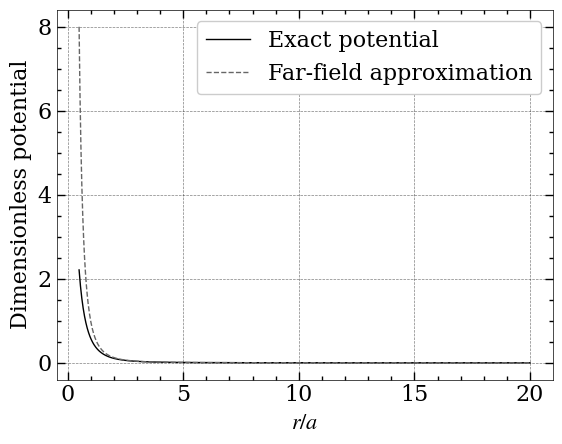

In [2]:
# dimensionless distance
rho = np.linspace(0.5, 20, 1000)  # avoid rho=0

# dimensionless potentials (factoring out q / 4πϵ₀a)
phi_exact = (2/rho - 2/np.sqrt(rho**2 + 1))
phi_approx = rho**(-3)

plt.figure()
plt.plot(rho, phi_exact, label="Exact potential", color="black")
plt.plot(rho, phi_approx, "--", label="Far-field approximation", color="0.4")

plt.xlabel(r"$r/a$")
plt.ylabel(r"Dimensionless potential")

plt.legend(loc="best")
plt.savefig("farfield.png", dpi=300)
plt.show()

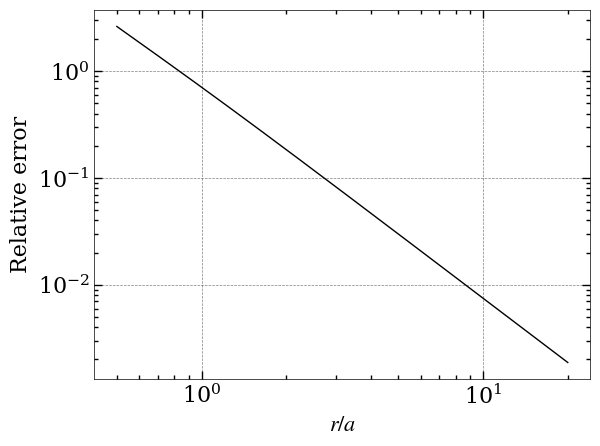

In [3]:
relative_error = np.abs((phi_exact - phi_approx) / phi_exact)

plt.figure()
plt.loglog(rho, relative_error, color="black")
plt.xlabel(r"$r/a$")
plt.ylabel("Relative error")
plt.savefig("relativeerror.png", dpi=300)
plt.show()

In [4]:
# tolerance for convergence
tol = 1e-1  # e.g. 1% relative error

# search domain
rho = np.linspace(0.5, 100, 200_000)

# dimensionless potentials
phi_exact = -(2/rho - 2/np.sqrt(rho**2 + 1))
phi_approx = -rho**(-3)

# relative error
rel_error = np.abs((phi_exact - phi_approx) / phi_exact)

# find smallest rho satisfying the tolerance condition
mask = rel_error < tol
rho_min = rho[mask][0]

rho_min


2.724333621668108